<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/9)_B)_NY_Negative_Tweets_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis

!pip install -U scikit-learn # updating sklearn to avoid depreciation warnings
!pip install --upgrade pandas==1.2  # Need to upgrade pandas to get pyLDAvis to work 

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

In [10]:
# Upload negative tweets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_NEG_COVID19_TWEETS.csv')
tweets_df = data.iloc[:, 1:]

In [3]:
tweets_list = tweets_df['Text'].tolist()

In [4]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf = tf_vectorizer.fit_transform(tweets_list) # document-term matrix
alpha = 1     #Dirichlet prior of document-topic dist
beta = 0.05   #Dirichlet prior of topic-term dist

In [5]:
lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 3 Topics:',lda_model3.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 3 Topics:', lda_model3.score(tf))

Model Perplexity - 3 Topics: 15617.654535565587
Model Log-Likelihood - 3 Topics: -71364332.30841084


In [6]:
lda_model4 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 4 Topics:',lda_model4.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 4 Topics:', lda_model4.score(tf))

Model Perplexity - 4 Topics: 15283.191120113417
Model Log-Likelihood - 4 Topics: -71204338.90059397


In [10]:
lda_model5 = LatentDirichletAllocation(n_components=5, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 5 Topics:',lda_model5.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 5 Topics:', lda_model5.score(tf))

Model Perplexity - 5 Topics: 15127.233460460357
Model Log-Likelihood - 5 Topics: -71128534.41483672


In [11]:
lda_model6 = LatentDirichletAllocation(n_components=6, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 6 Topics:',lda_model6.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 6 Topics:', lda_model6.score(tf))

Model Perplexity - 6 Topics: 15060.349410700182
Model Log-Likelihood - 6 Topics: -71095785.13122016


In [18]:
lda_model7 = LatentDirichletAllocation(n_components=7, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 7 Topics:',lda_model7.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 7 Topics:', lda_model7.score(tf))

Model Perplexity - 7 Topics: 15069.987551922311
Model Log-Likelihood - 7 Topics: -71100513.33498393


In [21]:
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model3, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)  

In [19]:
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model6, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)

##Below are screenshots of the output from code above as it does not show up in git repo 

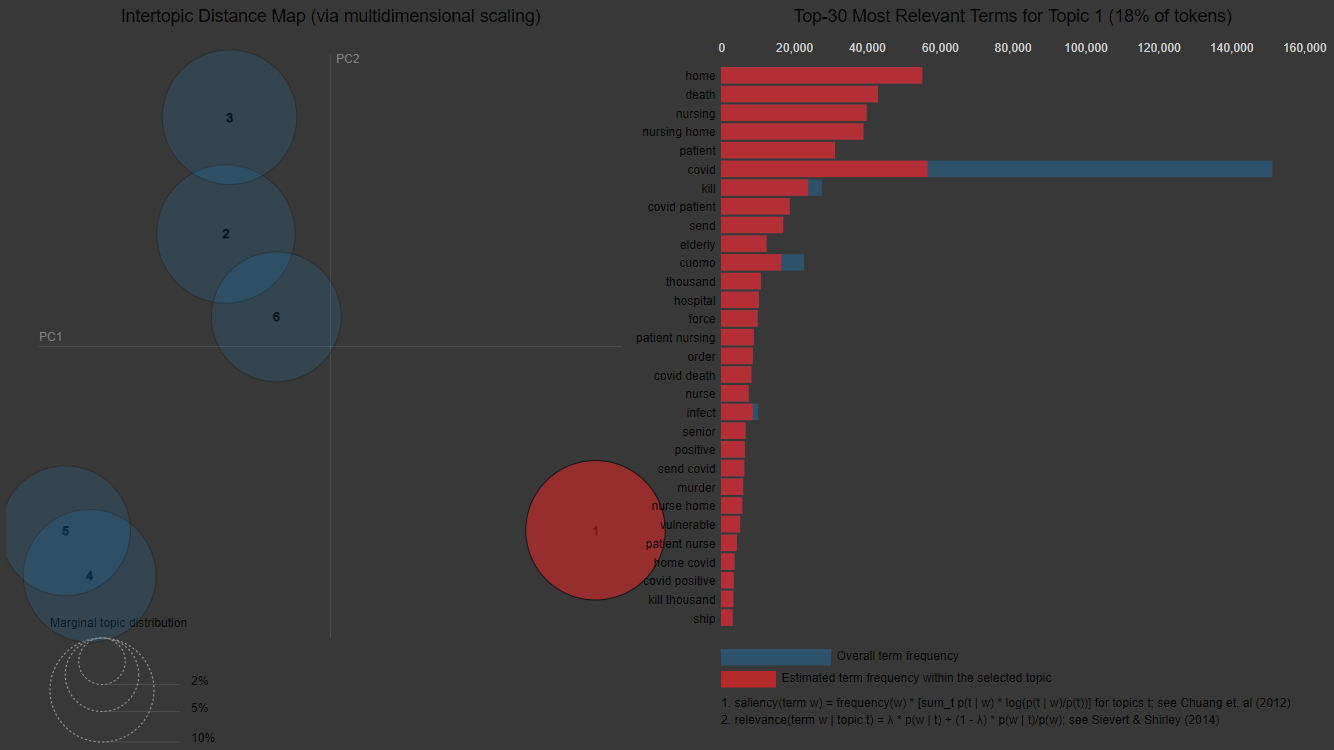

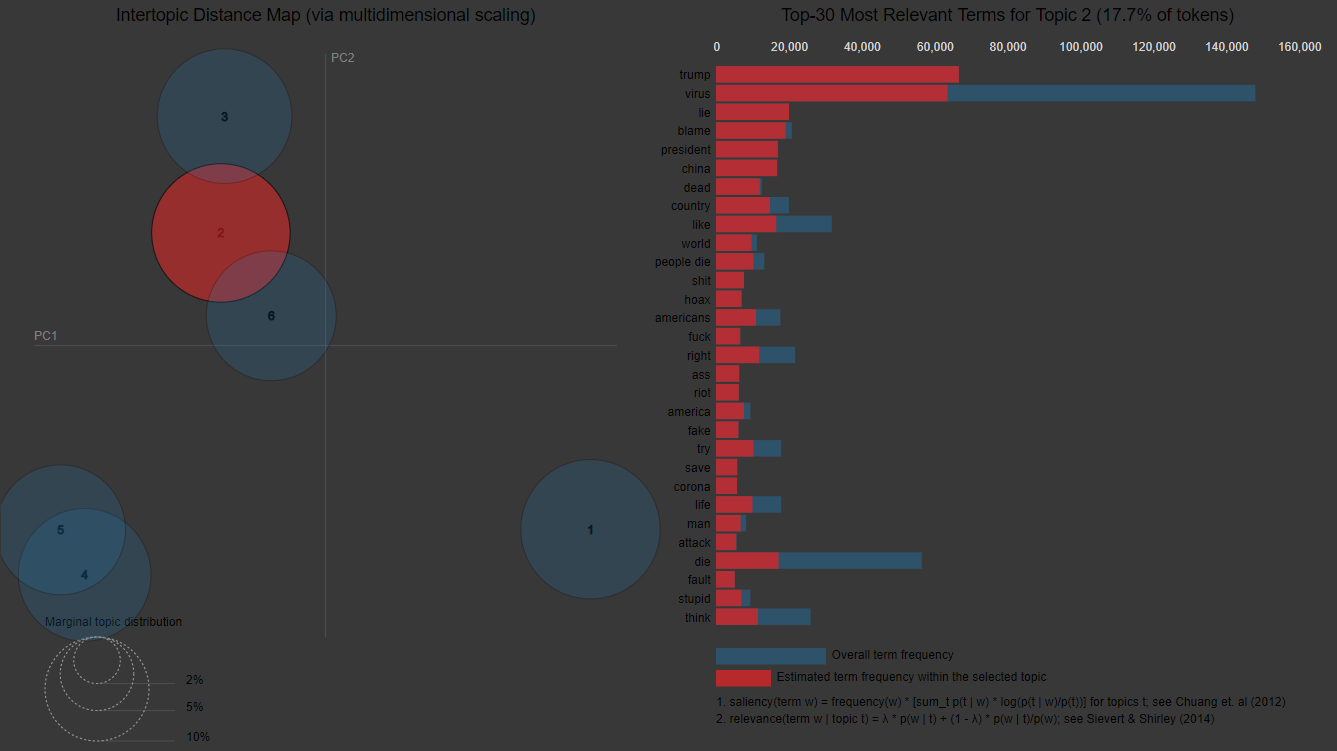

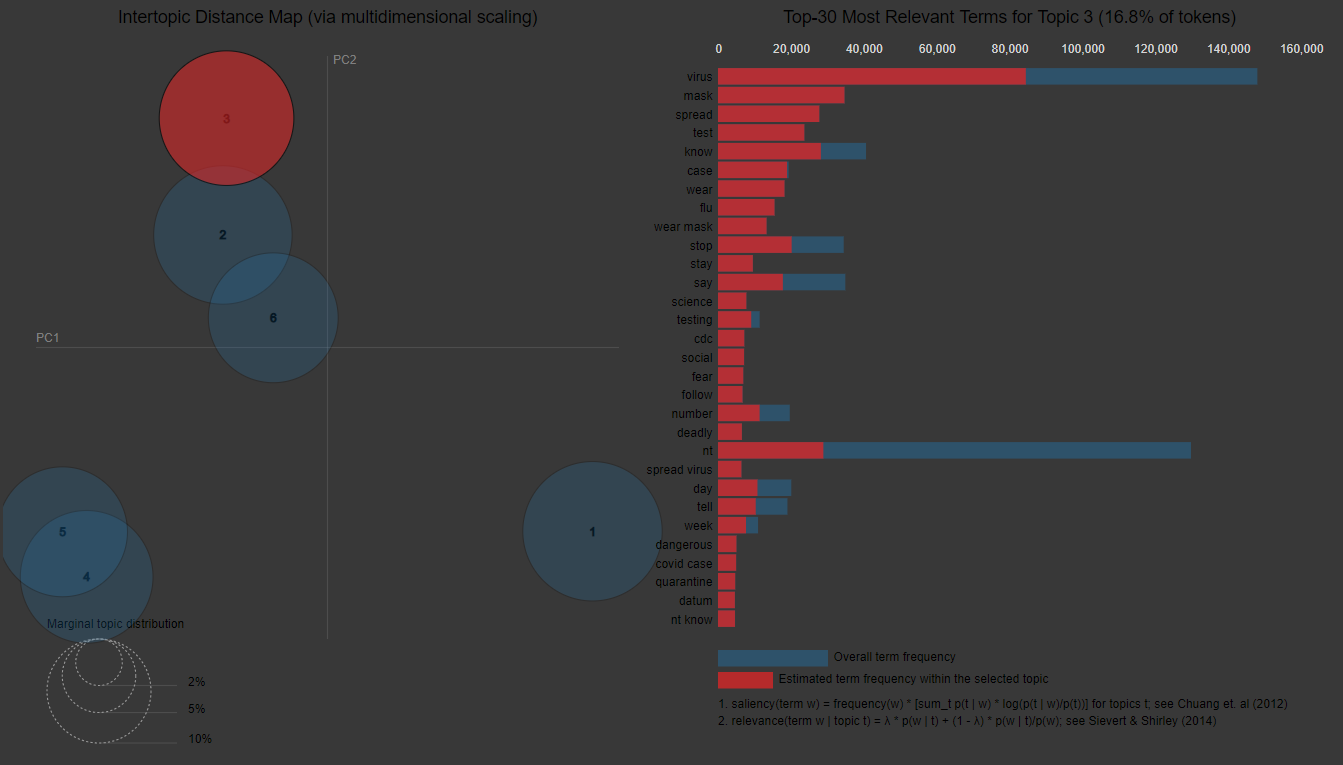

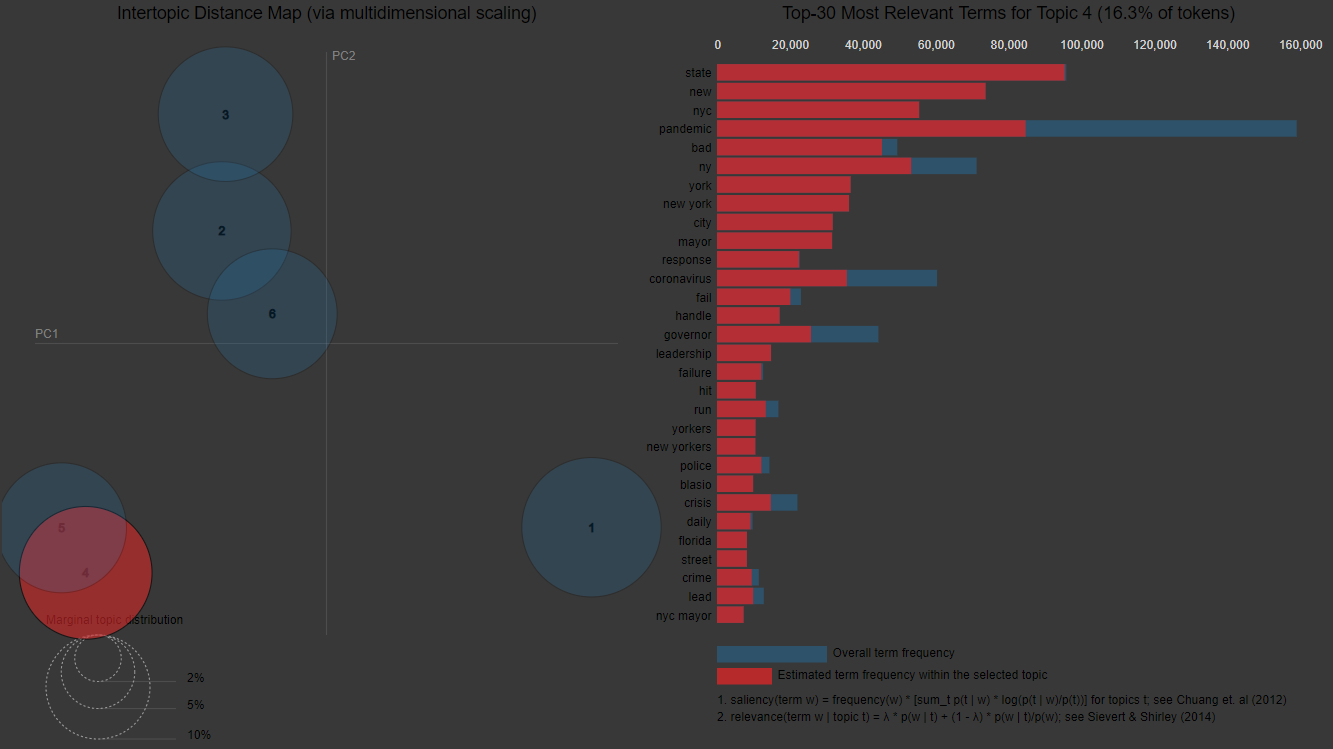

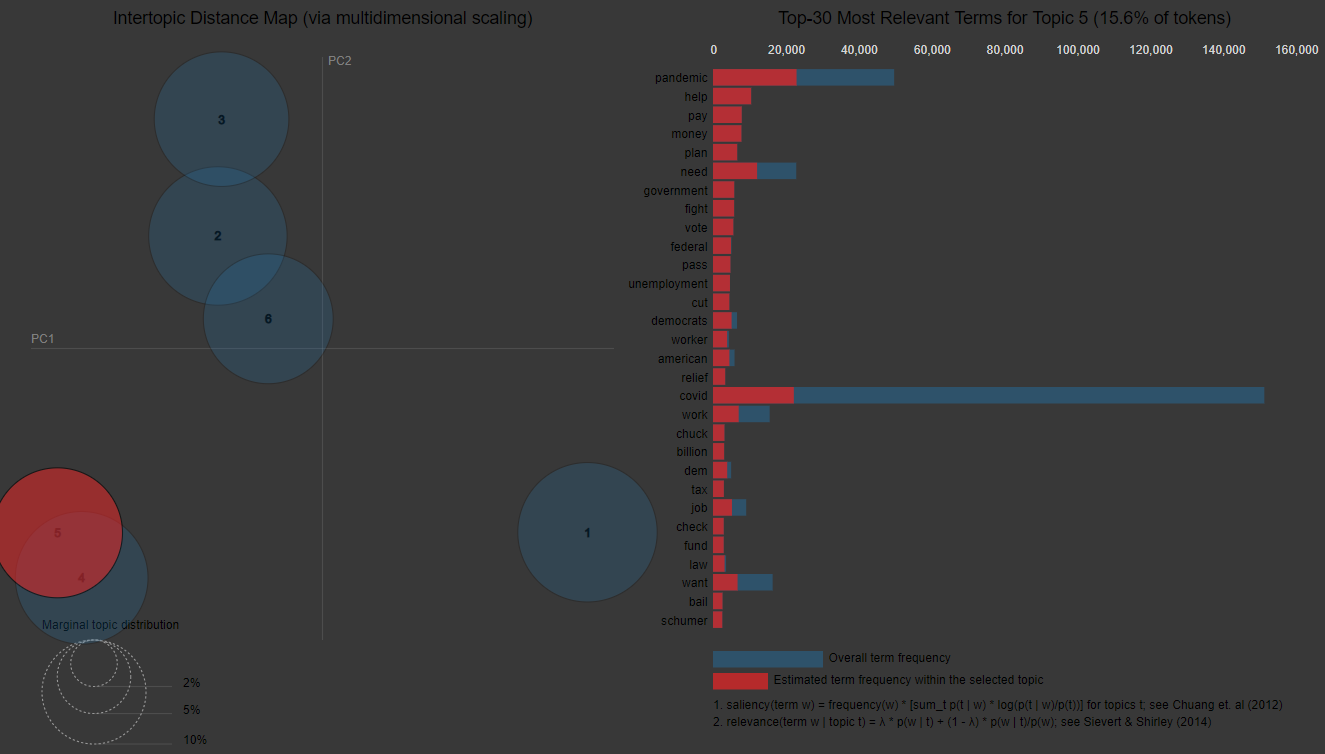

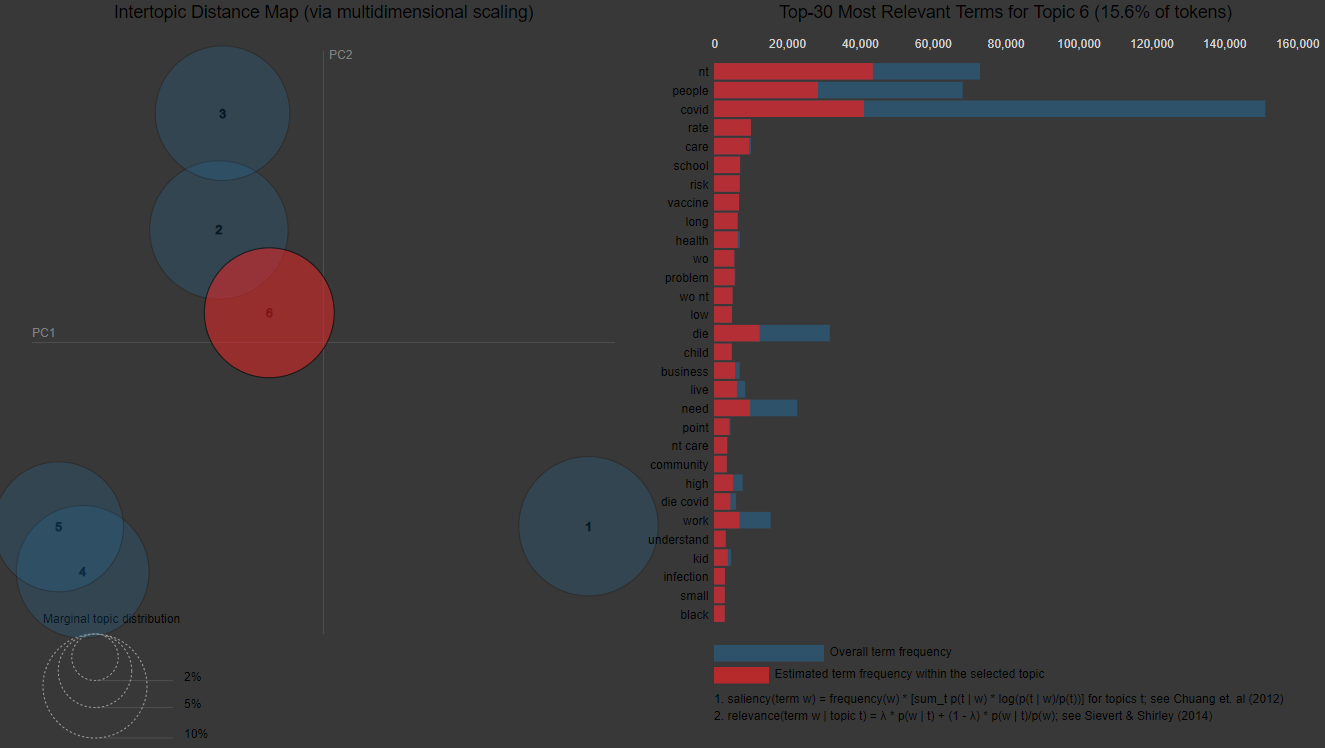

In [2]:
from IPython.display import Image, display

listOfImageNames = ['/content/drive/MyDrive/Colab Notebooks/negtopic1ny.png',
                    '/content/drive/MyDrive/Colab Notebooks/negtopic2ny.png',
                    '/content/drive/MyDrive/Colab Notebooks/negtopic3ny.png',
                    '/content/drive/MyDrive/Colab Notebooks/negtopic4ny.png',
                    '/content/drive/MyDrive/Colab Notebooks/negtopic5ny.png',
                    '/content/drive/MyDrive/Colab Notebooks/negtopic6ny.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [22]:
# Getting predicted topic for each tweet 
tweet_topics = lda_model3.transform(tf)

Topic_Assigned = [] 
for t in range(tweet_topics.shape[0]):
  predicted_topic = tweet_topics[t].argmax()
  Topic_Assigned.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic_Neg3'] = Topic_Assigned
tweets_df[:3]

[1, 1, 1, 2, 2, 2, 1, 0, 1, 2]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_Neg3
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0,1
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0,1
2,2021-05-30,pay tribute give defense country battle field ...,this is about paying tribute to those who ga...,-0.6170,19.150,negative,2,1


In [23]:
# Getting predicted topic for each tweet 
tweet_topics1 = lda_model6.transform(tf)

Topic_Assigned1 = [] 
for t in range(tweet_topics1.shape[0]):
  predicted_topic1 = tweet_topics1[t].argmax()
  Topic_Assigned1.append(predicted_topic1)
  predicted_topic1 = None

print(Topic_Assigned1[:10])

tweets_df['Topic_Neg'] = Topic_Assigned1
tweets_df[:3]

[5, 5, 1, 5, 2, 2, 5, 0, 4, 0]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_Neg3,Topic_Neg
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0,1,5
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0,1,5
2,2021-05-30,pay tribute give defense country battle field ...,this is about paying tribute to those who ga...,-0.6170,19.150,negative,2,1,1


In [24]:
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_NEG_COVID19_TWEETS_TOPICS.csv')

In [25]:
def get_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keys = get_topics(tf_vectorizer, lda_model3, 40)

df_topic_keys = pd.DataFrame(topic_keys)
df_topic_keys.columns = ['Word '+str(i) for i in range(df_topic_keys.shape[1])]
df_topic_keys.index = ['Topic '+str(i) for i in range(df_topic_keys.shape[0])]

In [26]:
# Getting top words for each topic 
Topics_theme = ['Topic1', 'Topic2', 'Topic3']
df_topic_keys['topic_theme'] = Topics_theme
df_topic_keys.set_index('topic_theme', inplace=True)
print(df_topic_keys.T)

topic_theme           Topic1       Topic2     Topic3
Word 0                 covid     pandemic      virus
Word 1                  home        trump         nt
Word 2                 death        virus      covid
Word 3               nursing        covid     people
Word 4          nursing home           nt       mask
Word 5               patient        state     spread
Word 6                  kill      country       test
Word 7                 cuomo       people       work
Word 8                    ny         want       need
Word 9                   die         stop       wear
Word 10               people    americans       know
Word 11        covid patient    president       stop
Word 12                  new        china   pandemic
Word 13                 send          lie       case
Word 14                state  coronavirus        flu
Word 15             governor          nyc        die
Word 16              elderly         need        day
Word 17                 york         like     

In [29]:
# Getting top words for each topic (6)
topic_keys6 = get_topics(tf_vectorizer, lda_model6, 40)

df_topic_keys6 = pd.DataFrame(topic_keys6)
df_topic_keys6.columns = ['Word '+str(i) for i in range(df_topic_keys6.shape[1])]
df_topic_keys6.index = ['Topic '+str(i) for i in range(df_topic_keys6.shape[0])]

Topics_theme6 = ['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6']
df_topic_keys6['topic_theme'] = Topics_theme6
df_topic_keys6.set_index('topic_theme', inplace=True)
print(df_topic_keys6.T)

topic_theme        Topic1       Topic2  ...       Topic5        Topic6
Word 0              virus        trump  ...        state      pandemic
Word 1               mask        virus  ...     pandemic         covid
Word 2                 nt       people  ...          new          need
Word 3               know          lie  ...          nyc          help
Word 4             spread        blame  ...           ny           pay
Word 5              covid          die  ...          bad         money
Word 6               test    president  ...         york          work
Word 7               stop        china  ...     new york          want
Word 8               case         like  ...  coronavirus          plan
Word 9               wear           nt  ...         city    government
Word 10               say      country  ...        mayor         fight
Word 11            people        covid  ...        covid          vote
Word 12               flu         dead  ...     governor           job
Word 1

In [30]:
df_topic_keys.T.to_csv('/content/drive/MyDrive/Colab Notebooks/TOPIC_WORDS_NEG_ON.csv')
df_topic_keys6.T.to_csv('/content/drive/MyDrive/Colab Notebooks/TOPIC_WORDS_NEG6_ON.csv')